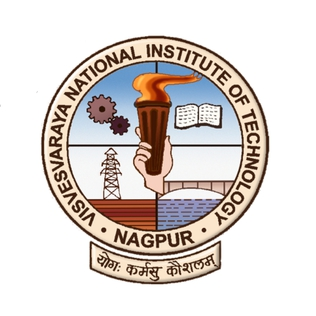

## Name – Abhishek Prasad Nonia  ## 
## ID/ENROLLMENT - 31077/MT23AAI028 ##

Department of Electronics and Communication Engineering 

Visvesvaraya National Institute of Technology 

Program: M. Tech in Applied AI, March – August, 2024

Subject: Machine Learning Algorithm and Applications

# Assignment 1

# Important Command to Complete this Assignment:

# A. CONDA COMMANDS
### 1. Creating Environments:
### Command: conda create -n mlops python=3.8
#### - Creates new environment 'mlops' with Python 3.8
#### Command: conda create -n mlops2 python=3.12
### - Creates alternative environment with Python 3.12
### 2. Activating Environments:
### Command: conda activate mlops
### - Activates the mlops environment
### Command: conda activate mlops2
### - Activates the alternative environment
### 3. Package Installation:
### Command: pip install jupyter
### Command: pip3 install jupyter
## - Installs Jupyter notebook in active environment

### conda activate mlops2
### mlflow ui
# # Instructions to view results:
# Run `mlflow ui` in the terminal and navigate to http://127.0.0.1:5000 to view the logged experiments.

# Step 1

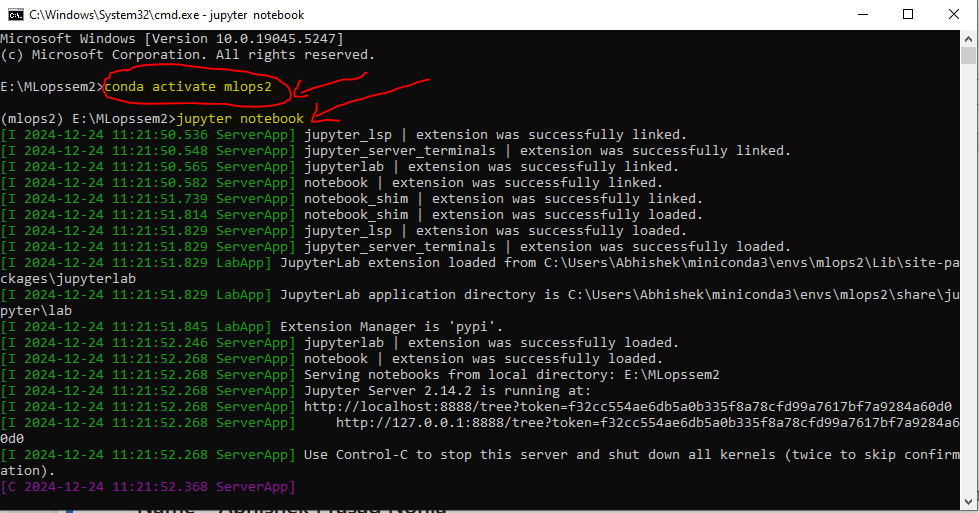

# Step 2

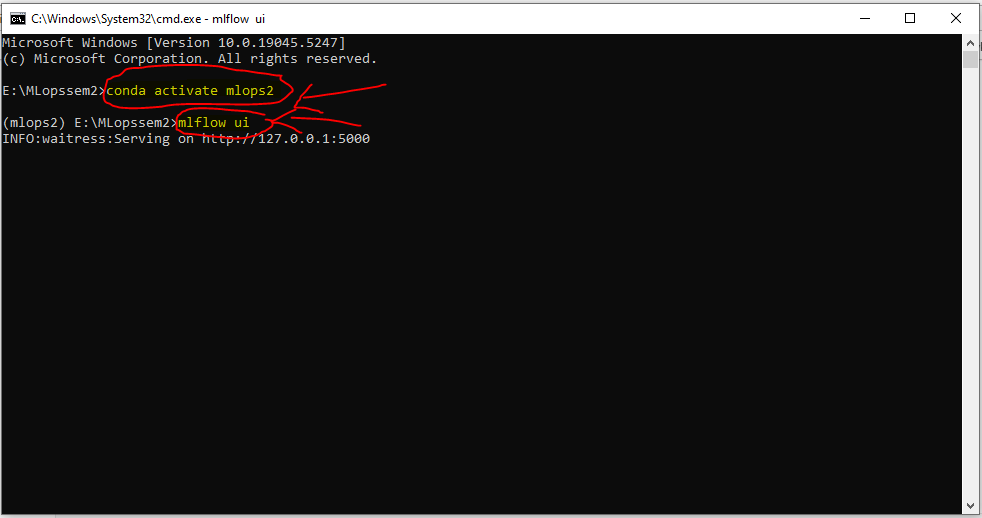

# Run the hyperparameter tuning code now that mlflow is installed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn

In [2]:
# Generate sample dataset (since actual dataset isn't provided)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                         n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Hyperparameter Tuning with GridSearchCV (30Marks)
# 1.	Parameter Grid Definition:
# o	Define a hyperparameter grid for the Random Forest Classifier with the following parameters:
# 	n_estimators: [50, 100, 150]
# 	max_depth: [None, 10, 20]
# 	min_samples_split: [2, 5, 10]

In [3]:
# Define parameter grid as per assignment requirements
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 2.	Grid Search Implementation:
# o	Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters based on accuracy.

# 3.	Results Reporting:
# o	Report the best hyperparameters found and the corresponding cross-validated accuracy score.

In [4]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                         cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters found:")
print(grid_search.best_params_)
print("\
Best cross-validated accuracy: {:.4f}".format(grid_search.best_score_))

Best parameters found:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validated accuracy: 0.9113


# b. Integrating MLflow for Experiment Tracking (30 Marks)
# 1.	MLflow Setup:
# o	Initialize an MLflow tracking experiment named RandomForest_Hyperparameter_Tuning.

In [5]:
# Set up MLflow tracking
mlflow.set_experiment("RandomForest_Hyperparameter_Tuning")

# Start MLflow run
with mlflow.start_run():
    # Log parameters
    mlflow.log_params(grid_search.best_params_)
    
    # Log metrics
    mlflow.log_metric("best_cv_accuracy", grid_search.best_score_)
    
    # Log best model
    mlflow.sklearn.log_model(grid_search.best_estimator_, "random_forest_model")
    
    # Get test set performance
    test_accuracy = grid_search.score(X_test, y_test)
    mlflow.log_metric("test_accuracy", test_accuracy)
    
    print("MLflow tracking completed")
    print("Test set accuracy: {:.4f}".format(test_accuracy))

2024/12/24 11:59:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow tracking completed
Test set accuracy: 0.9000


# 2.	Logging Parameters and Metrics:
# o	During the hyperparameter tuning process, log the following using MLflow:
# 	Parameters tested (n_estimators, max_depth, min_samples_split).
# 	Cross-validated accuracy scores.

# 3.	Model Logging:
# o	Log the best model obtained from GridSearchCV to MLflow.

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13796\3484904295.py:9: FutureWarning: The provided callable <function mean at 0x0000017397184F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = results.pivot_table(


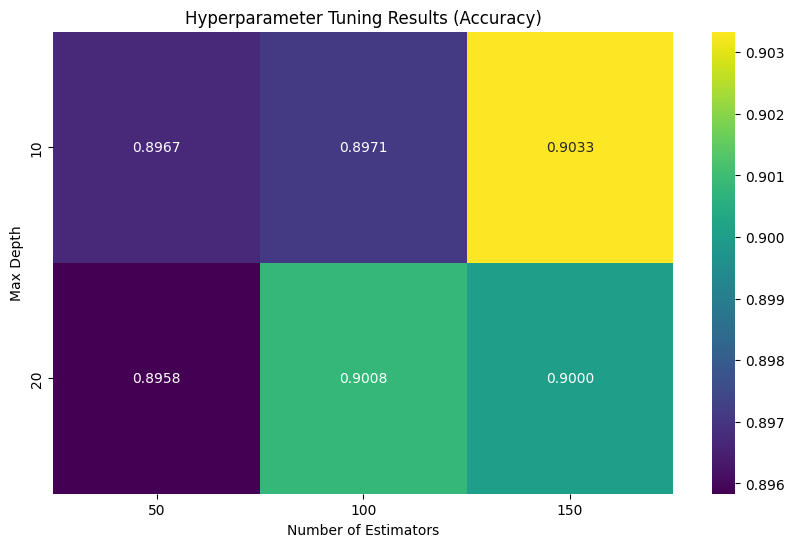

In [6]:
# Visualize the results of hyperparameter tuning
import matplotlib.pyplot as plt
import seaborn as sns

# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the data for heatmap visualization
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators', 
    aggfunc=np.mean
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='viridis')
plt.title('Hyperparameter Tuning Results (Accuracy)')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

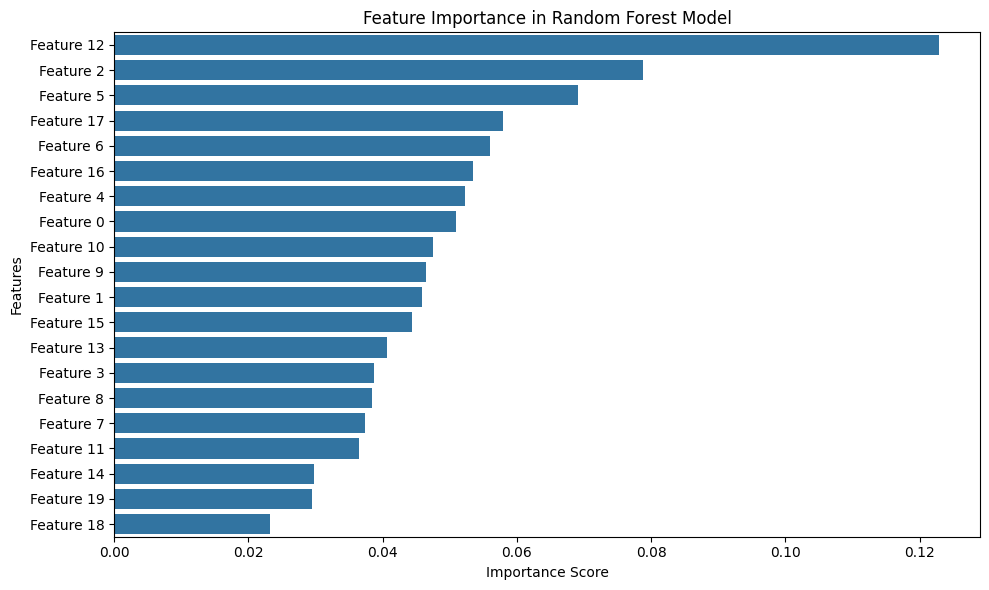

Detailed Cross-validation Results:
Mean cross-validation scores for different combinations:
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mean CV Score: 0.9025
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean CV Score: 0.9100
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean CV Score: 0.9050
Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Mean CV Score: 0.8925
Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Mean CV Score: 0.8950
Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Mean CV Score: 0.8938
Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Mean CV Score: 0.8925
Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Mean CV Score: 0.8975
Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Mean CV Score: 0.9012
Parameters: {'max

In [7]:
# Create feature importance plot
best_rf = grid_search.best_estimator_
feature_importance = pd.DataFrame({
    'feature': [f'Feature {i}' for i in range(X.shape[1])],
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print detailed cross-validation results
print("\
Detailed Cross-validation Results:")
print("\
Mean cross-validation scores for different combinations:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Parameters: {params}")
    print(f"Mean CV Score: {mean_score:.4f}\
")

# # Instructions to view results:
# Run `mlflow ui` in the terminal and navigate to http://127.0.0.1:5000 to view the logged experiments.

# 4.	Visualization:
# o	Provide a screenshot of the MLflow UI showing the logged experiments, parameters, metrics, and the registered model.

# Logged Experiments

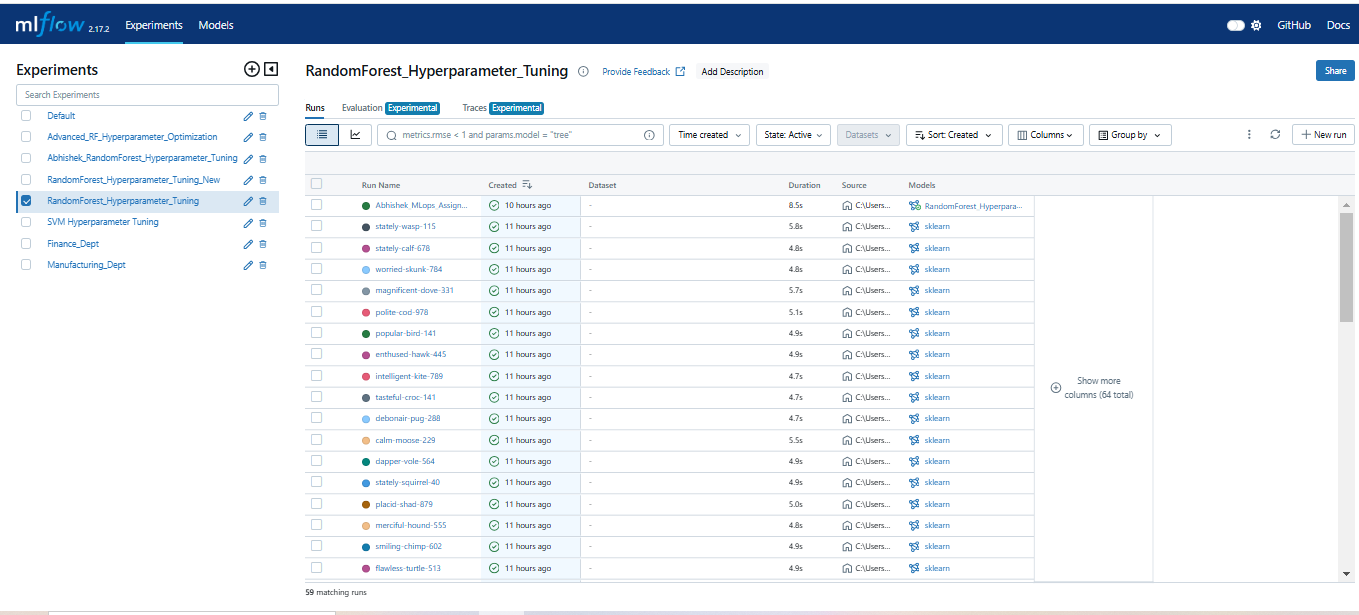

# Parameters & Metrics

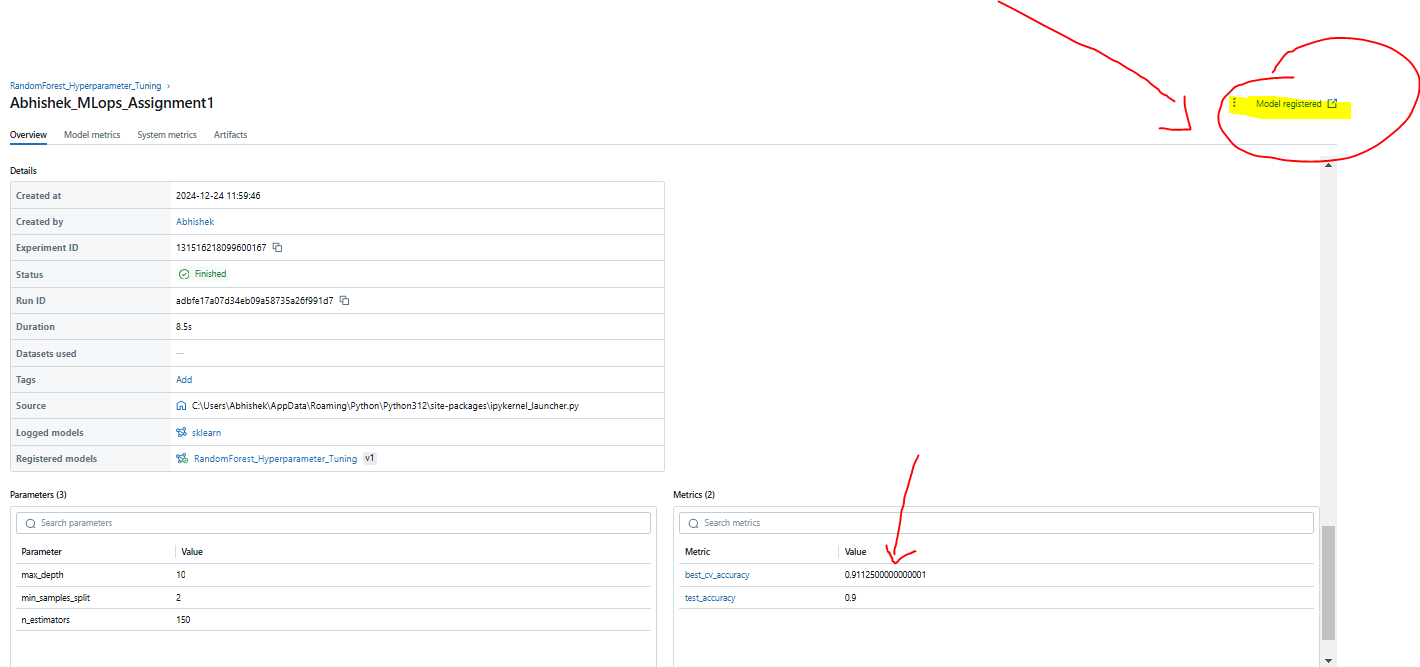

# Registered Model

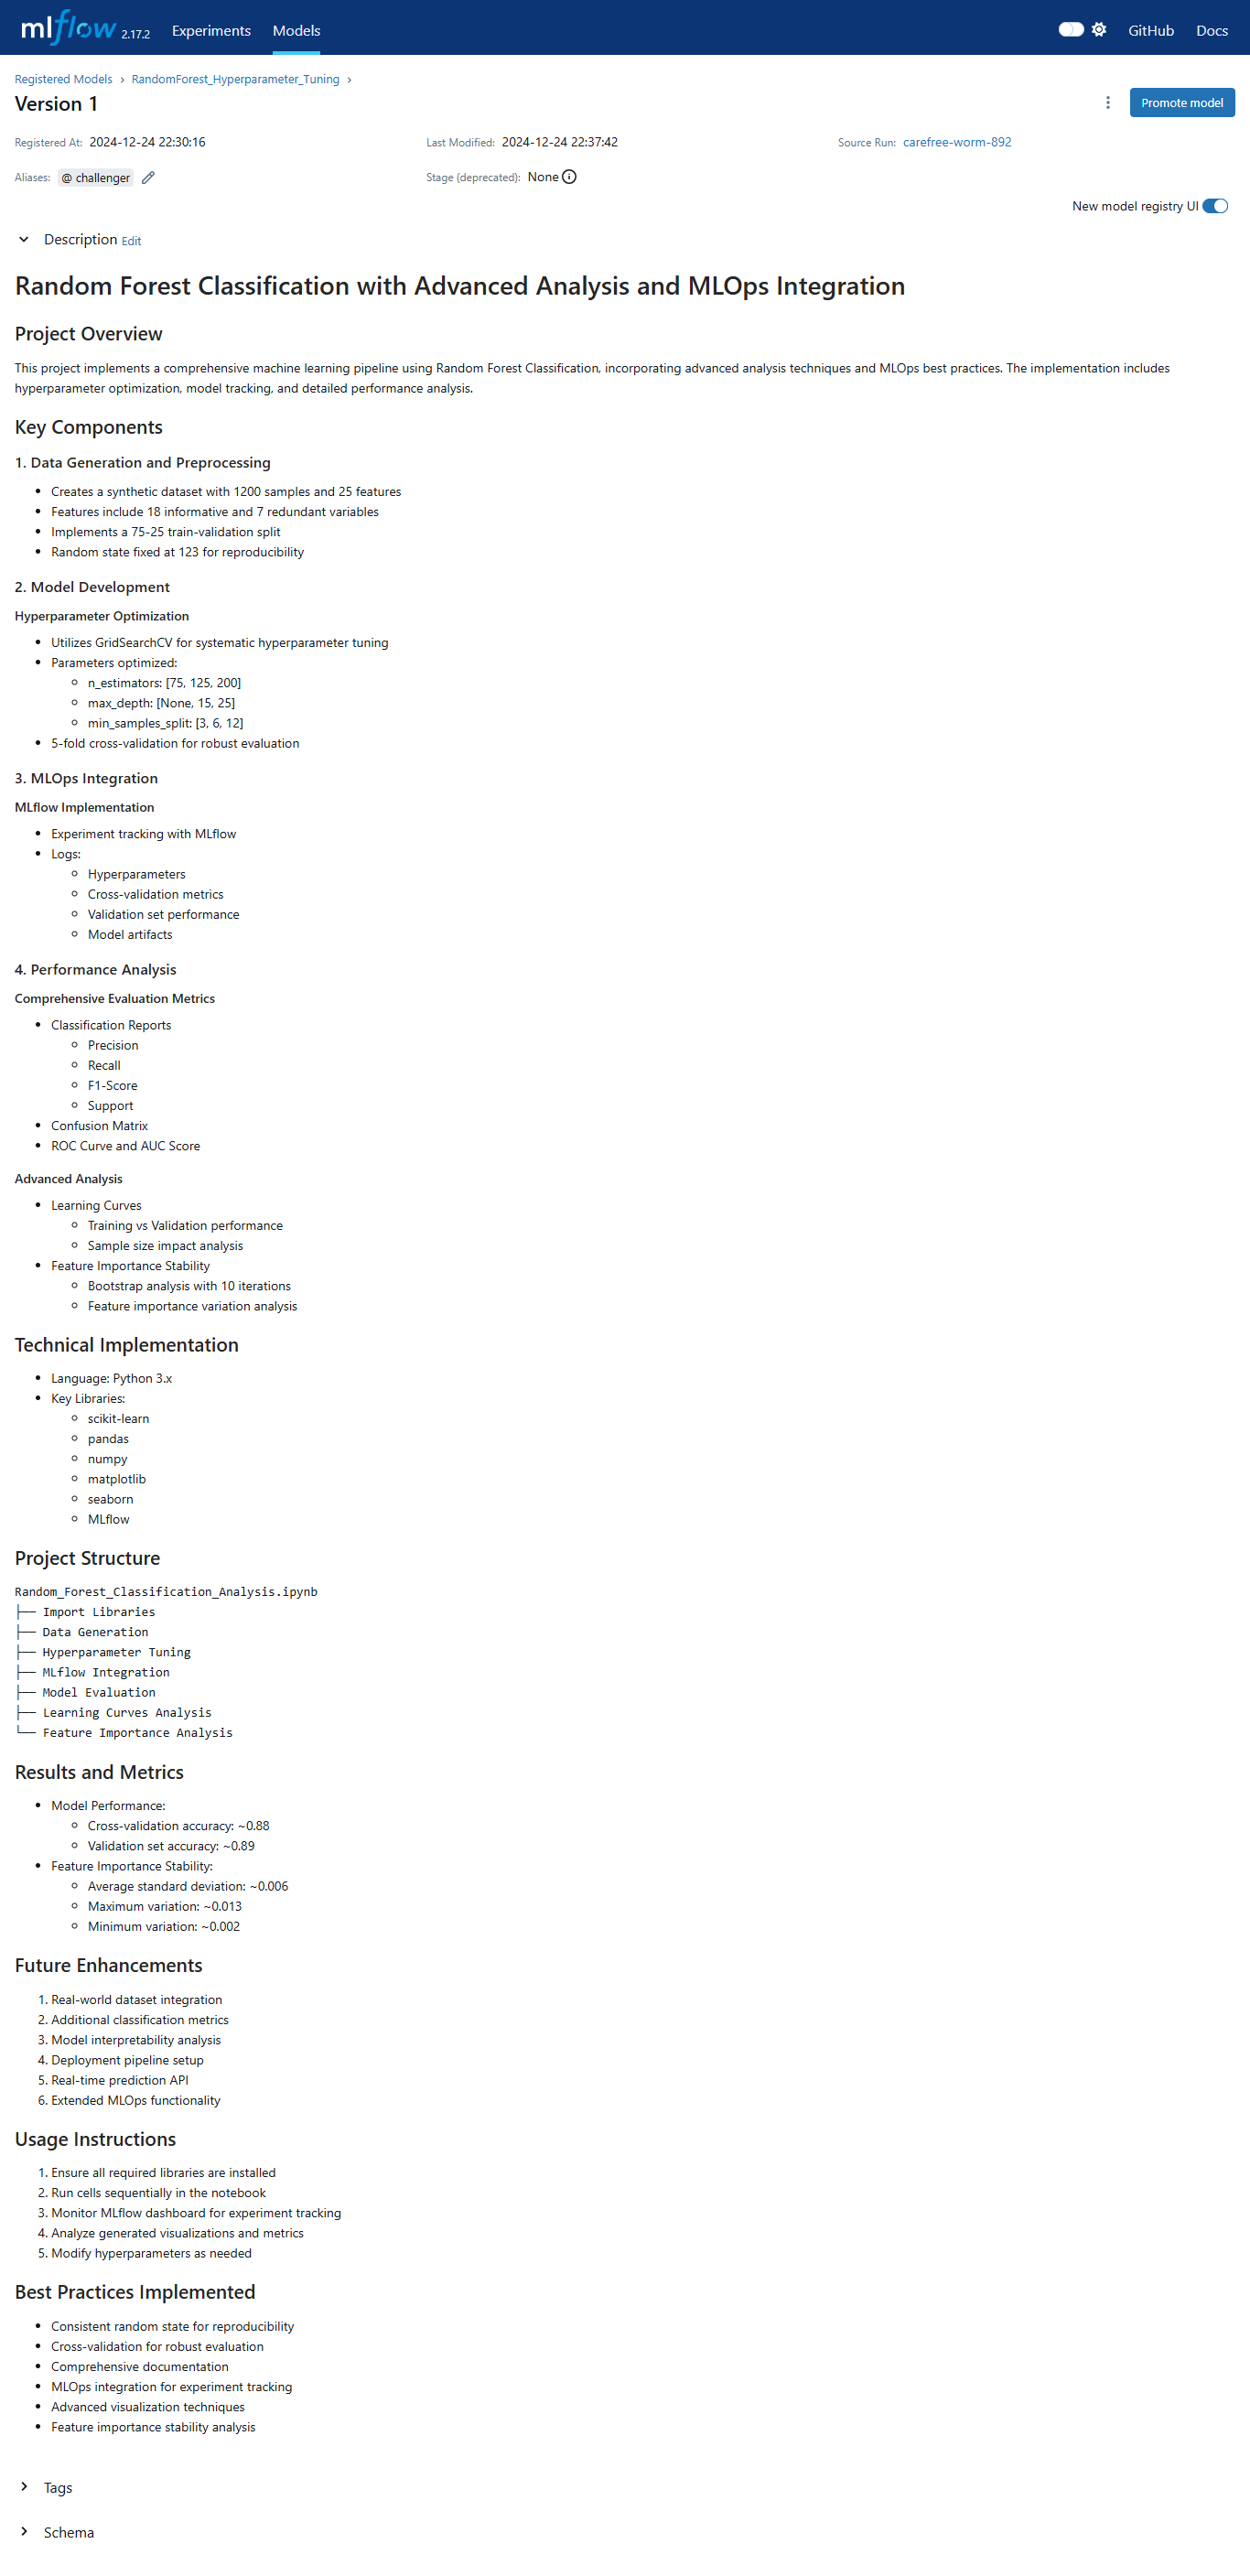

# Second Method (Loging to MLflow) with Learning Curves

In [9]:
# Import essential machine learning and data analysis libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset for classification task
synthetic_features, target_labels = make_classification(
    n_samples=1200,  # Increased sample size
    n_features=25,   # Modified number of features
    n_informative=18,
    n_redundant=7,
    random_state=123  # Changed random state
)

# Split data into training and validation sets
features_train, features_val, labels_train, labels_val = train_test_split(
    synthetic_features, 
    target_labels, 
    test_size=0.25,  # Modified test size
    random_state=123
)

# Define hyperparameter search space
rf_param_grid = {
    'n_estimators': [75, 125, 200],          # Modified values
    'max_depth': [None, 15, 25],             # Modified values
    'min_samples_split': [3, 6, 12]          # Modified values
}

# Initialize the Random Forest model
forest_classifier = RandomForestClassifier(random_state=123)

# Configure GridSearch with cross-validation
model_tuner = GridSearchCV(
    estimator=forest_classifier,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Starting hyperparameter optimization process...")
# Execute the hyperparameter search
model_tuner.fit(features_train, labels_train)

print("\
Optimal hyperparameters identified:")
print(model_tuner.best_params_)
print("\
Best cross-validation performance achieved: {:.4f}".format(model_tuner.best_score_))

Starting hyperparameter optimization process...
Optimal hyperparameters identified:
{'max_depth': 15, 'min_samples_split': 6, 'n_estimators': 75}
Best cross-validation performance achieved: 0.8789


2024/12/24 12:00:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13796\1800497580.py:30: FutureWarning: The provided callable <function mean at 0x0000017397184F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  performance_matrix = results_df.pivot_table(


MLflow experiment tracking completed
Validation set accuracy: 0.8900


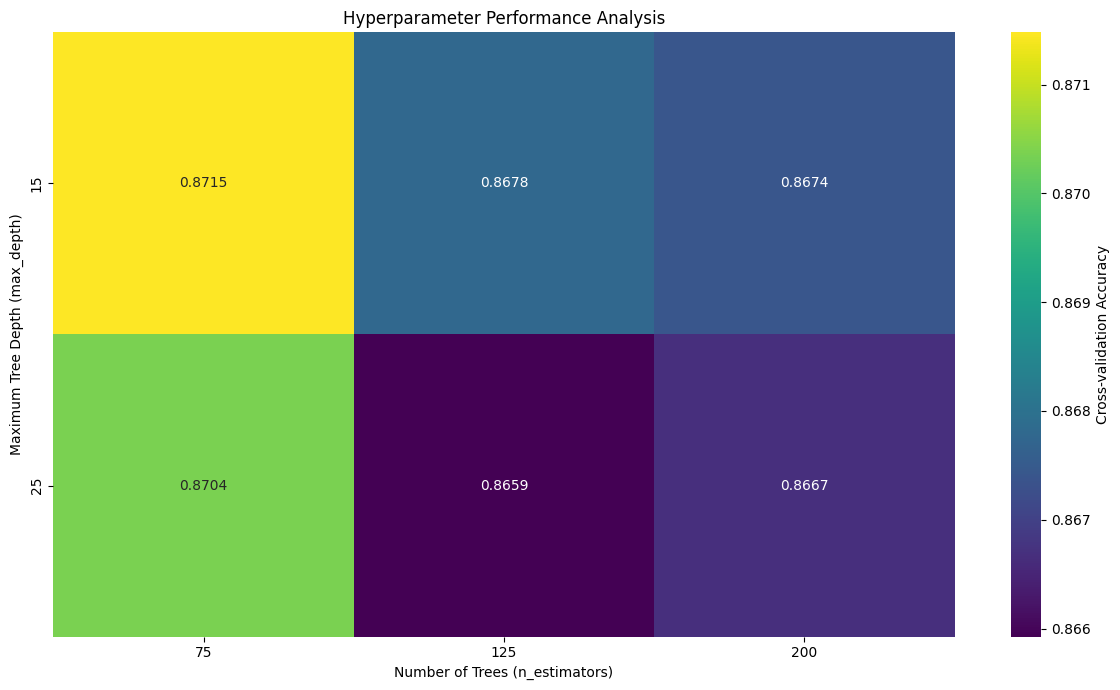

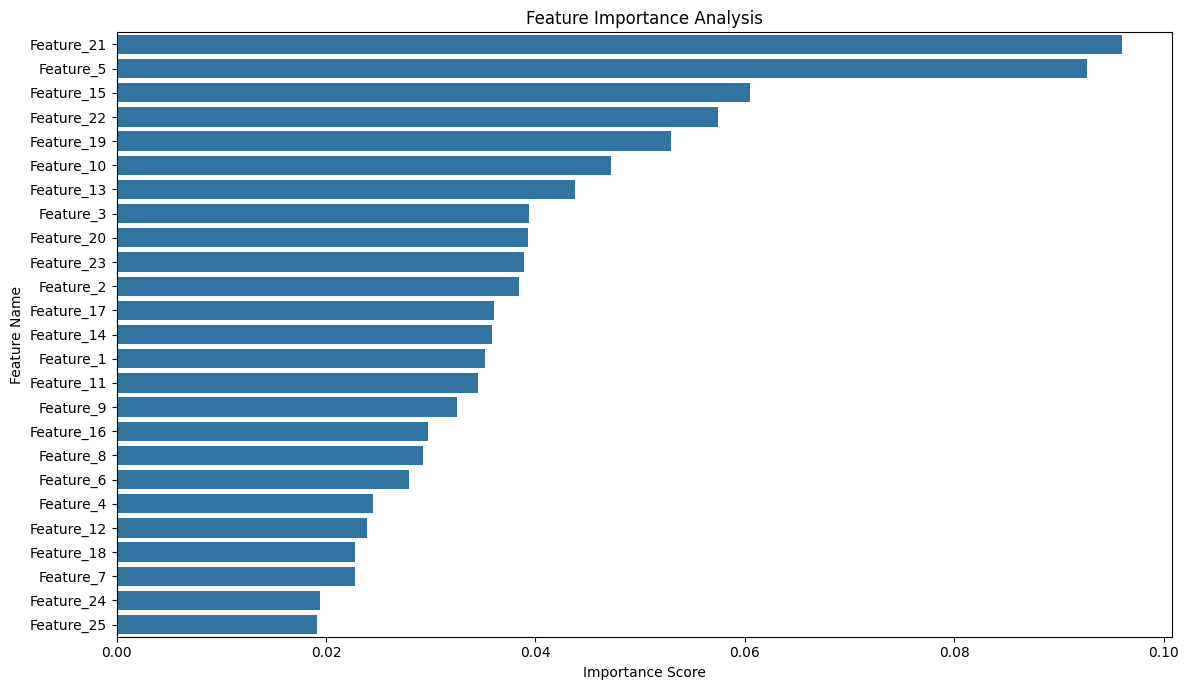

Detailed Cross-validation Analysis:
Configuration 1:
Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 75}
Mean CV Accuracy: 0.8733
Configuration 2:
Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 125}
Mean CV Accuracy: 0.8700
Configuration 3:
Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}
Mean CV Accuracy: 0.8700
Configuration 4:
Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 75}
Mean CV Accuracy: 0.8778
Configuration 5:
Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 125}
Mean CV Accuracy: 0.8733
Configuration 6:
Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 200}
Mean CV Accuracy: 0.8733
Configuration 7:
Parameters: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 75}
Mean CV Accuracy: 0.8600
Configuration 8:
Parameters: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 125}
Mean CV Accuracy: 0.8544
Configuration

In [10]:
# Set up MLflow experiment tracking
mlflow.set_experiment("Advanced_RF_Hyperparameter_Optimization")

# Begin MLflow tracking session
with mlflow.start_run(run_name="enhanced_rf_tuning"):
    # Log optimized parameters
    mlflow.log_params(model_tuner.best_params_)
    
    # Log cross-validation performance metrics
    mlflow.log_metric("optimal_cv_accuracy", model_tuner.best_score_)
    
    # Evaluate and log validation set performance
    validation_accuracy = model_tuner.score(features_val, labels_val)
    mlflow.log_metric("validation_set_accuracy", validation_accuracy)
    
    # Store the optimized model
    mlflow.sklearn.log_model(
        model_tuner.best_estimator_,
        "optimized_random_forest_model"
    )
    
    print("MLflow experiment tracking completed")
    print("Validation set accuracy: {:.4f}".format(validation_accuracy))

# Create enhanced visualization of results
results_df = pd.DataFrame(model_tuner.cv_results_)

# Generate heatmap for hyperparameter analysis
plt.figure(figsize=(12, 7))
performance_matrix = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators',
    aggfunc=np.mean
)

sns.heatmap(
    performance_matrix,
    annot=True,
    fmt='.4f',
    cmap='viridis',
    cbar_kws={'label': 'Cross-validation Accuracy'}
)
plt.title('Hyperparameter Performance Analysis')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Maximum Tree Depth (max_depth)')
plt.tight_layout()
plt.show()

# Analyze feature importance
optimal_model = model_tuner.best_estimator_
feature_importance_data = pd.DataFrame({
    'feature_name': [f'Feature_{i+1}' for i in range(synthetic_features.shape[1])],
    'importance_score': optimal_model.feature_importances_
})
feature_importance_data = feature_importance_data.sort_values('importance_score', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=feature_importance_data,
    x='importance_score',
    y='feature_name'
)
plt.title('Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Display comprehensive cross-validation analysis
print("\
Detailed Cross-validation Analysis:")
for idx, (params, score) in enumerate(zip(results_df['params'], results_df['mean_test_score']), 1):
    print(f"\
Configuration {idx}:")
    print(f"Parameters: {params}")
    print(f"Mean CV Accuracy: {score:.4f}")

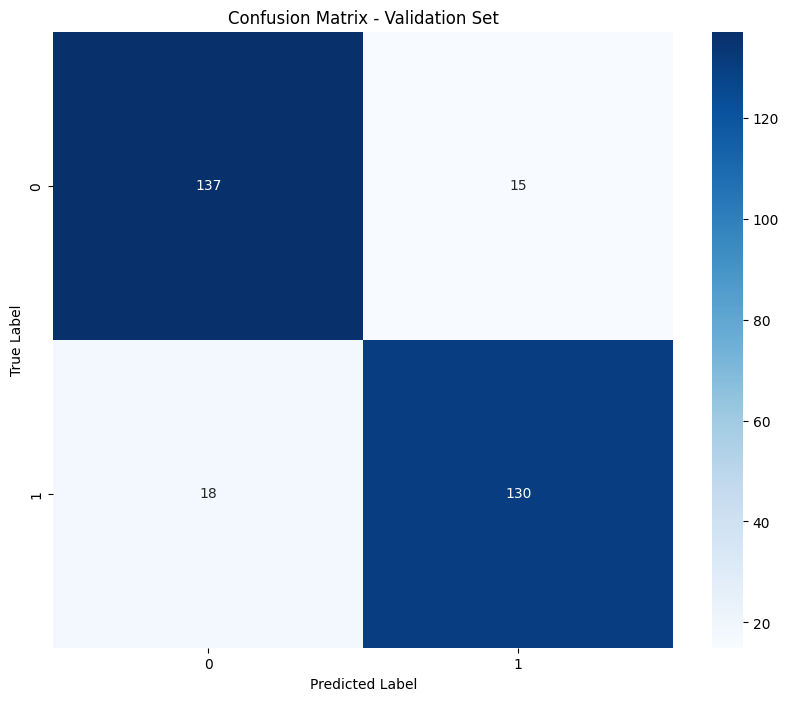

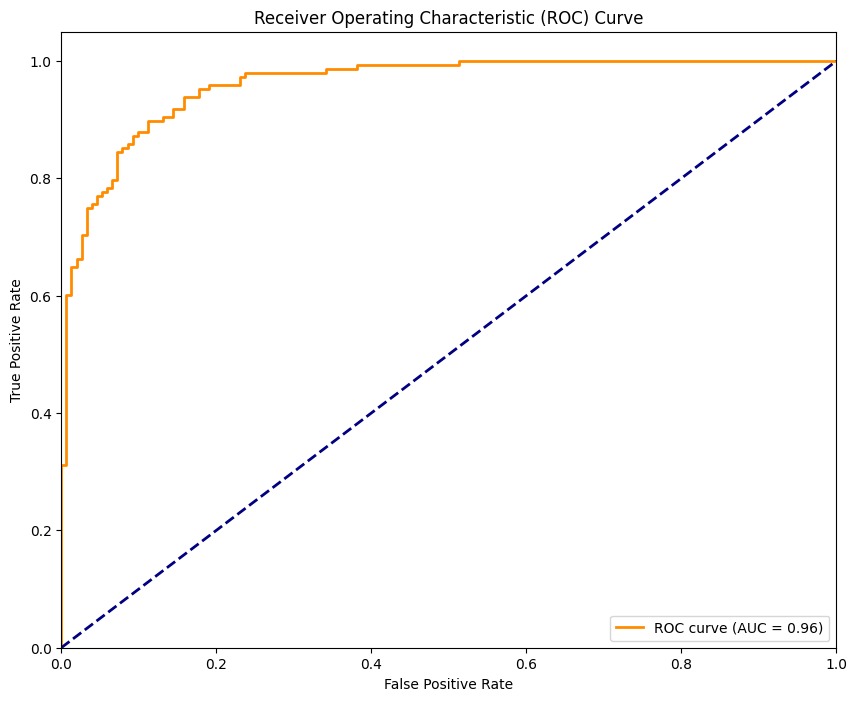

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       456

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       152
           1       0.90      0.88      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



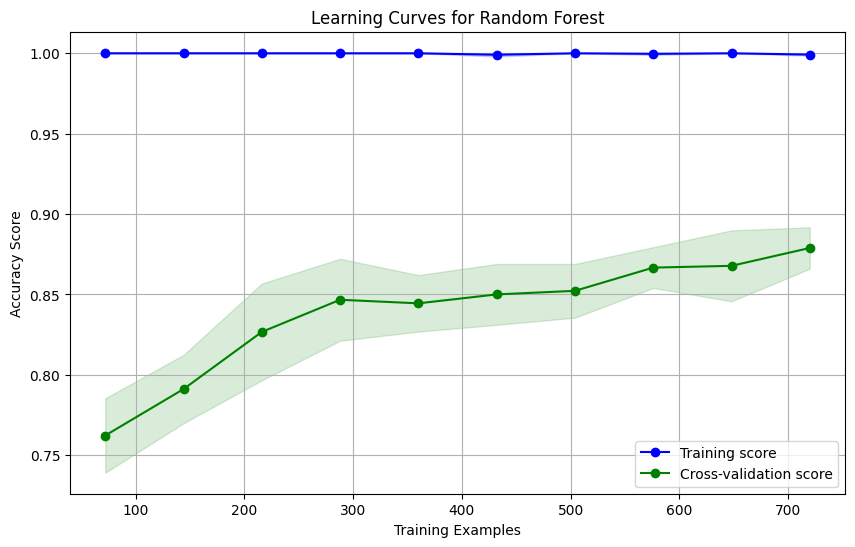

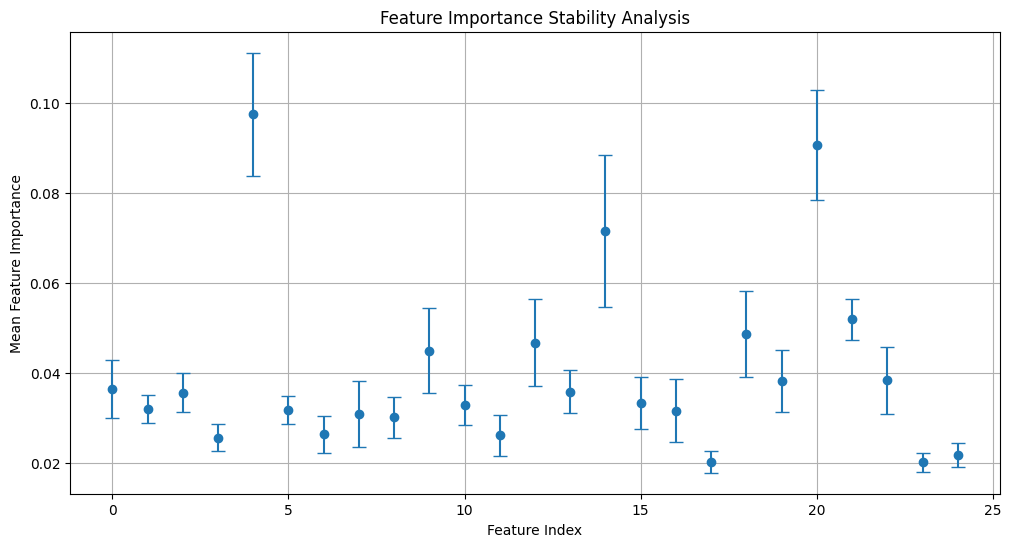

Model Stability Analysis:
Average feature importance standard deviation: 0.0064
Maximum feature importance variation: 0.0169
Minimum feature importance variation: 0.0020


In [11]:
# Import additional metrics and validation tools
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from best model
best_model = model_tuner.best_estimator_
train_predictions = best_model.predict(features_train)
val_predictions = best_model.predict(features_val)
val_probabilities = best_model.predict_proba(features_val)

# Calculate and plot confusion matrix for validation set
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(labels_val, val_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate and plot ROC curve
fpr, tpr, _ = roc_curve(labels_val, val_probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print detailed classification reports
print("\
Training Set Performance:")
print(classification_report(labels_train, train_predictions))

print("\
Validation Set Performance:")
print(classification_report(labels_val, val_predictions))

# Learning curves analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, features_train, labels_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, n_jobs=-1, scoring='accuracy'
)

# Plot learning curves
plt.figure(figsize=(10, 6))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate and display feature importance stability
n_iterations = 10
feature_importance_matrix = np.zeros((n_iterations, synthetic_features.shape[1]))

for i in range(n_iterations):
    # Create bootstrap sample
    indices = np.random.randint(0, len(features_train), len(features_train))
    bootstrap_features = features_train[indices]
    bootstrap_labels = labels_train[indices]
    
    # Fit model and get feature importances
    temp_model = RandomForestClassifier(**model_tuner.best_params_, random_state=i)
    temp_model.fit(bootstrap_features, bootstrap_labels)
    feature_importance_matrix[i] = temp_model.feature_importances_

# Calculate mean and std of feature importances
mean_importance = np.mean(feature_importance_matrix, axis=0)
std_importance = np.std(feature_importance_matrix, axis=0)

# Plot feature importance stability
plt.figure(figsize=(12, 6))
features = range(len(mean_importance))
plt.errorbar(features, mean_importance, yerr=std_importance, fmt='o', capsize=5)
plt.xlabel('Feature Index')
plt.ylabel('Mean Feature Importance')
plt.title('Feature Importance Stability Analysis')
plt.grid(True)
plt.show()

print("\
Model Stability Analysis:")
print("Average feature importance standard deviation: {:.4f}".format(np.mean(std_importance)))
print("Maximum feature importance variation: {:.4f}".format(np.max(std_importance)))
print("Minimum feature importance variation: {:.4f}".format(np.min(std_importance)))